# [Data Train] Competição ML #2 - SECITEC 2020 IFG
## CRISP-DM: Data Understanding
**Autor:** Wanderson Marques - wdsmarques@gmail.com

Esse Jupyter Notebook contém uma **análise exploratória** dos dados. Considerando a metodologia CRISP-DM, essa atividade refere-se à segunda fase, o entendimento dos dados. 

<img src="imgs/dataUnderstanding.jpg" />

### Carregar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
# Exibir gráficos dentro do Jupyter Notebook
%matplotlib inline

# Definir tamanho padrão para os gráficos
rcParams['figure.figsize'] = 17, 4

### Carregar dataset

In [9]:
dataset = pd.read_csv('datasets/treino.csv')

# Eliminar o identificador dos passageiros
dataset.drop(['id'], axis=1, inplace=True)

### Entender os atributos

>#### Dicionário de dados:
>**idademae**: Idade da mãe em anos <br>
**estadocivilmae:** Estado Civil da Mãe <br>
**catprenatal:** Quantidade de Consultas pré-natal realizadas pela mãe	 <br>
**qtdsemanas:** Idade gestacional no momento do parto em semanas	 <br>
**tipoparto**: Tipo do parto	 <br>
**peso:** Peso do recém-nascido no momento do nascimento em gramas	 <br>
**malformacao:** Se foi observada alguma mal formação no bebê	 <br> 
**sexo:** Sexo do recém-nascio (f=feminino, m=masculino)	 <br>
**apgar1:** Apgar no 1º Minuto	 <br>
**apgar5:** Apgar no 5º Minuto <br>
**obito:** Indica se o recém-nascido veio a óbito antes de completar 1 ano de vida

### Verificar tipos dos atributos

In [10]:
dataset.dtypes

idademae          float64
estadocivilmae     object
catprenatal        object
qtdsemanas        float64
tipoparto          object
peso              float64
malformacao        object
sexo               object
apgar1            float64
apgar5            float64
obito               int64
dtype: object

### Ver forma do dataset

In [11]:
# [0] = Quantidade de instâncias
# [1] = Quantidade de atributos
print("O dataset contém ", dataset.shape[0], "instâncias e ", dataset.shape[1], " atributos.")

O dataset contém  11389 instâncias e  11  atributos.


### Observar amostra dos dados

In [12]:
# .sample() Mostra uma amostra aleatória
# .head() Mostra as primeiras instâncias
# .tail() Mostra as últimas instâncias
dataset.sample(10)

,idademae,estadocivilmae,catprenatal,qtdsemanas,tipoparto,peso,malformacao,sexo,apgar1,apgar5,obito
4042,25.0,uniao,de4a6,36.0,cesareo,1230.0,nao,m,6.0,8.0,0
3912,21.0,casada,7mais,39.0,cesareo,4370.0,nao,m,9.0,10.0,0
9692,22.0,solteira,7mais,39.0,cesareo,3770.0,nao,m,7.0,8.0,0
432,16.0,uniao,de4a6,25.0,cesareo,720.0,NaN,f,1.0,0.0,1
4956,27.0,uniao,de4a6,35.0,vaginal,2660.0,nao,m,8.0,10.0,0
4931,23.0,casada,7mais,39.0,cesareo,3100.0,nao,m,8.0,10.0,0
9217,28.0,solteira,7mais,39.0,vaginal,2000.0,nao,m,0.0,1.0,1
9641,31.0,casada,de4a6,41.0,cesareo,2990.0,nao,f,7.0,9.0,0
3169,17.0,uniao,7mais,37.0,cesareo,3142.0,nao,f,1.0,6.0,0
7343,30.0,casada,7mais,38.0,vaginal,3502.0,nao,f,9.0,10.0,0


### Descrever estatisticamente os dados

In [13]:
# Somente atributos numéricos são considerados
dataset.describe()

,idademae,qtdsemanas,peso,apgar1,apgar5,obito
count,11389.000000,11163.000000,11387.000000,11289.000000,11294.000000,11389.000000
mean,25.793748,36.952611,2818.527883,7.503765,8.716664,0.260427
std,6.468443,4.421121,930.575296,2.348192,2.120168,0.438887
min,11.000000,19.000000,150.000000,0.000000,0.000000,0.000000
25%,21.000000,37.000000,2550.000000,7.000000,9.000000,0.000000
50%,25.000000,38.000000,3060.000000,8.000000,9.000000,0.000000
75%,30.000000,39.000000,3412.000000,9.000000,10.000000,1.000000
max,52.000000,45.000000,6651.000000,10.000000,10.000000,1.000000


Por meio da análise de quartis, já pode-se perceber a presença de outliers em algumas variáveis. A tabela descritiva também trás outras informações relevantes, como os valores máximos, mínimos e desvio padrão para cada atributo.

### Verificar presença de valores nulos

In [14]:
# Quantidade absoluta
totalNulos = (dataset.isnull()).sum()
totalNulos

idademae            0
estadocivilmae     96
catprenatal        40
qtdsemanas        226
tipoparto           5
peso                2
malformacao       304
sexo               39
apgar1            100
apgar5             95
obito               0
dtype: int64

### Separar atributos numéricos e categóricos

In [15]:
# Percentual
percentualNulos = (totalNulos / len(dataset)) * 100
percentualNulos

idademae          0.000000
estadocivilmae    0.842919
catprenatal       0.351216
qtdsemanas        1.984371
tipoparto         0.043902
peso              0.017561
malformacao       2.669242
sexo              0.342436
apgar1            0.878040
apgar5            0.834138
obito             0.000000
dtype: float64

Em relação aos valores nulos, o atributo malformacao é o que mais se destaca.

In [16]:
# Apenas atributos int e float
numericos = (dataset.select_dtypes(include=['int64', 'float64'])).columns

In [17]:
# Apenas atributos object (string)
categoricos = (dataset.select_dtypes(include=['object'])).columns

### Visualizar presença de outliers  (atributos numéricos)

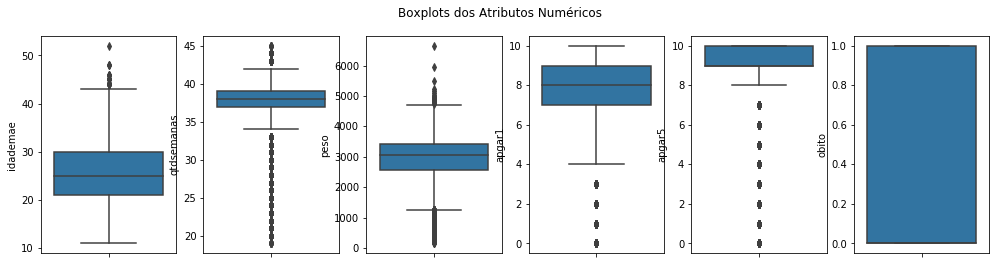

In [18]:
fig, ax = plt.subplots(ncols=len(numericos), nrows=1)
plt.suptitle("Boxplots dos Atributos Numéricos")

# Gráfico para cada atributo numérico
for i in range(0, len(numericos)):
    feature = numericos[i]
    sns.boxplot(dataset[feature], ax=ax[i], orient='vertical')

Os boxplots acima mostra ainda mais claramente a existência de outliers para quase todas as variáveis. Em etapas posteriores, pode ser que seja necessário realizar algum tratamento nas instâncias que apresentam esse tipo de comportamento.

### Visualizar distribuição dos dados (atributos numéricos)

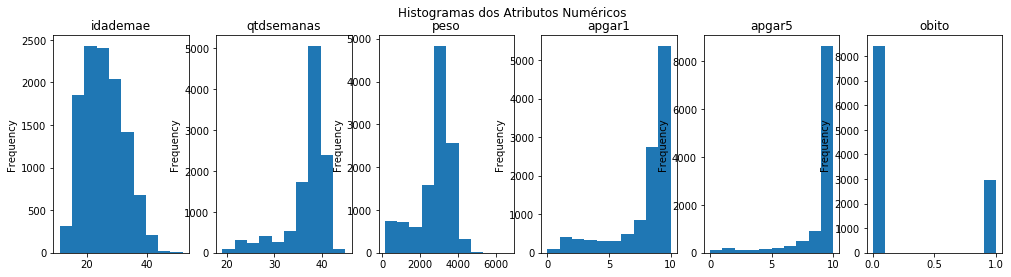

In [19]:
fig, ax = plt.subplots(ncols=len(numericos), nrows=1)
plt.suptitle("Histogramas dos Atributos Numéricos")

# Histograma para cada atributo numérico
for i in range(0, len(numericos)):
    feature = numericos[i]
    ax[i].set_title(feature)
    dataset[feature].plot(kind='hist', ax=ax[i])

Analisando as distribuições, temos que:
- A variável idademae é a que mais se aproxima de uma Distribuição Normal
- A classe óbito está desbalanceada

### Visualizar distribuição dos dados (atributos categóricos)

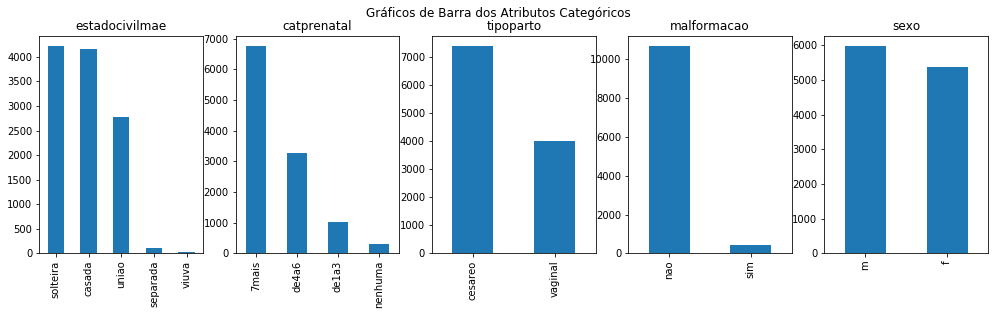

In [20]:
fig, ax = plt.subplots(ncols=len(categoricos), nrows=1)
plt.suptitle("Gráficos de Barra dos Atributos Categóricos")

# Gráfico para cada atributo categórico
for i in range(0, len(categoricos)):
    feature = categoricos[i]
    ax[i].set_title(feature)
    dataset[feature].value_counts().plot(kind='bar', ax=ax[i])

### Calcular correlações

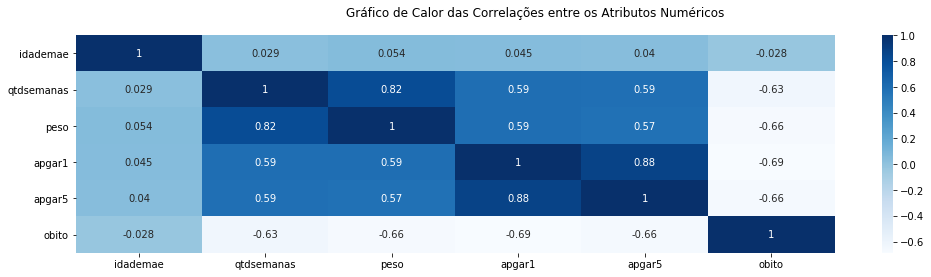

In [21]:
# Somente atributos numéricos são considerados
plt.suptitle("Gráfico de Calor das Correlações entre os Atributos Numéricos")
sns.heatmap(dataset.corr(), annot=True, cmap='Blues')

O gráfico de calor mostra que as variáveis mais correlacionadas são Apgar1 e Apgar5 (positivamente) e obito e apgar1 (negativamente).